References
--
https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression

https://www.kaggle.com/babarohitk/boston-house-prices-from-sklearn-datasets/edit

In [119]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from math import log
from prettytable import PrettyTable
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Data Frame

In [207]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


## SkLearn Implementation of SGD

In [208]:
# Loading the data from Boston house prices dataset in sklearn library
X = load_boston().data
Y = load_boston().target
type(X)

numpy.ndarray

In [209]:
# Splitting Data to Train(70%) and Test(30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [210]:
# Standardization
scale = preprocessing.StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_train = np.array(X_train)
X_test = scale.transform(X_test)
X_test = np.array(X_test)

In [211]:
# SGD Implementation
Sgd1 = SGDRegressor()
Sgd1.fit(X_train, Y_train)

print("MSE :",mean_squared_error(Y_test, Sgd1.predict(X_test)))
MSE1 = mean_squared_error(Y_test, Sgd1.predict(X_test))
Weights1=Sgd1.coef_
print("No. of Features :",Weights1.size)

MSE : 18.157639814844508
No. of Features : 13


## Function for Custom SGD

In [218]:
round(0.0025,3)

0.003

In [336]:
# Converting Numpy array to Pandas dataframe to access Boston.data,boston.target and also using Sample function.
X_Train_Df=pd.DataFrame(X_train)
X_Train_Df['price']=Y_train


# Custom SGD Function
def CustomSGD(X_Train_Df,learning_rate,total_Loops=1000,k=10):
    #Initialising weights row vector in the shape 1,13(No of features)
    
    W=np.zeros(shape=(1,Weights1.shape[0]))
    b=0
    loop_Number=1
    while(loop_Number<=total_Loops):
        w_var=W
        b_var=b
        
        #Temporary looping variables for Weights and b
        w_temp=np.zeros(shape=(1,Weights1.shape[0]))
        b_temp=0
        
        #Choosing a sample of K form data
        temp=X_Train_Df.sample(k)
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_var,x[i])+b_var))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_var,x[i])+b_var))*(-2/k)
            
        W = w_var-learning_rate*w_temp
        b = b_var-learning_rate*b_temp
        
#       Exit condition(if change is very low from previous weights to initial weights, exit)
        if(w_var==W).all():
               break
        loop_Number+=1
#         countIter=0
#         for (a,b) in np.nditer([w_var,W]):            
#             if round(abs(a-b),4) == 0:
#                 #print("Iteration is one: ",loop_Number)
#                 countIter+=1
#                 if countIter>11:
#                     #print("Iteration is : ",loop_Number)
#                     #print(a,"    ",b)
#                     break
#         loop_Number+=1
        
    return W,b

# Function to calculate predicted Y and convert to scalar values
def convertToScalar(x,w,b):
    Y_pred=[]
    for i in range(len(x)):
        y=np.ndarray.item(np.dot(w,x[i])+b) 
        Y_pred.append(y)
    return np.array(Y_pred)

## Finding Optimal Learning Rate(r)

In [334]:
# Splitting data to Train and CV

x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3)
x1_train,x1_cv,y1_train_,y1_cv_=train_test_split(x1_train,y1_train,test_size=0.3)
scaler = preprocessing.StandardScaler().fit(x1_train)
x1_train = scaler.transform(x1_train)
x1_cv=scaler.transform(x1_cv)

x1_train_=np.array(x1_train)
x1_train_data=pd.DataFrame(x1_train)
x1_train_data['price']=y1_train_

x1_cv_=np.array(x1_cv)
x1_cv_data=pd.DataFrame(x1_cv_)
x1_cv_data['price']=y1_cv_


def OptimalLearningRate():
    
    MSE_Table=PrettyTable()
    MSE_Table.field_names=['MSE(Train)','Learning Rate(Train)']
    MSE_TableCv=PrettyTable()
    MSE_TableCv.field_names=['MSE(CV)','Learning Rate(CV)']
    
    min_mse=100000
    min_mseCv=100000
    Optimal_r=0
    Optimal_rCv=0
    train_error=[]
    cv_error=[]
    r=[0.00001,0.0001,0.001,0.01,0.1]
    
    for itr in r:
        
        #Train Data
        w,b=CustomSGD(x1_train_data,learning_rate=itr,total_Loops=1000)
        y1_pred_train=convertToScalar(x1_train_,w,b)
        train_error.append(mean_squared_error(y1_train_,y1_pred_train))
        mse_tr=mean_squared_error(y1_train_,y1_pred_train)
        MSE_Table.add_row([mse_tr,itr])
        
        if(mse_tr<min_mse):
            min_mse=mse_tr
            Optimal_r=itr
        
        #Cross validaion Data
        w,b=CustomSGD(x1_cv_data,learning_rate=itr,total_Loops=1000)
        y1_pred_cv=convertToScalar(x1_cv,w,b)
        cv_error.append(mean_squared_error(y1_cv_,y1_pred_cv))
        mse_cv=mean_squared_error(y1_cv_,y1_pred_cv)
        MSE_TableCv.add_row([mse_cv,itr])
            
        if(mse_cv<min_mseCv):
            min_mseCv=mse_cv
            Optimal_rCv=itr
            
    print(MSE_Table)
    print(MSE_TableCv)
    return train_error,cv_error,min_mse,Optimal_r,min_mseCv,Optimal_rCv


In [335]:
train_error,cv_error,min_mse,Optimal_r,min_mseCv,Optimal_rCv=OptimalLearningRate()
print("Minimum MSE(Train) is :",min_mse,"   Optimal Learning Rate(r) is :",Optimal_r)
print("Minimum MSE(cv) is :",min_mseCv,"   Optimal Learning Rate(r) is :",Optimal_rCv)

+--------------------+----------------------+
|     MSE(Train)     | Learning Rate(Train) |
+--------------------+----------------------+
| 538.0288121545107  |        1e-05         |
| 370.93528034917784 |        0.0001        |
| 33.660884652887475 |        0.001         |
| 23.20461760114213  |         0.01         |
| 27.153400023946872 |         0.1          |
+--------------------+----------------------+
+--------------------+-------------------+
|      MSE(CV)       | Learning Rate(CV) |
+--------------------+-------------------+
| 596.1439679388299  |       1e-05       |
| 367.07921884210316 |       0.0001      |
| 23.399067562243935 |       0.001       |
| 15.281535233864547 |        0.01       |
| 18.505922553811473 |        0.1        |
+--------------------+-------------------+
Minimum MSE(Train) is : 23.20461760114213    Optimal Learning Rate(r) is : 0.01
Minimum MSE(cv) is : 15.281535233864547    Optimal Learning Rate(r) is : 0.01


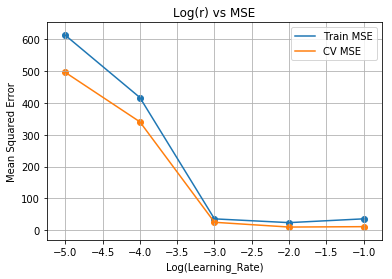

In [257]:
 # plotting obtained values
r=[0.00001,0.0001,0.001,0.01,0.1]
x1=[math.log10(i) for i in r]
plt.plot(x1,train_error,label='Train MSE')
plt.plot(x1,cv_error,label='CV MSE')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.title('Log(r) vs MSE')
plt.xlabel('Log(Learning_Rate)')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()

Observations
-------------------
*From the graph above, optimal learning rate is at r=0.01 with least Mean squared error.

*But we are getting better difference between CustomSGD and SklearnSGD with r=0.001

*Hence let us consider r=0.001 

## Custom Implementation of SGD with Optimal Learning Rate(r)

In [337]:
# CustomSGD with Optimal learning rate
Weights2,b=CustomSGD(X_Train_Df,learning_rate=0.01,total_Loops=1000)
Y_pred=convertToScalar(X_test,Weights2,b)
MSE2=mean_squared_error(Y_test, Y_pred)
print("Sklearn MSE: ",MSE1)
print("CustomSGD MSE: ",MSE2)

Sklearn MSE:  18.157639814844508
CustomSGD MSE:  19.38334778459909


## Comparision of Models

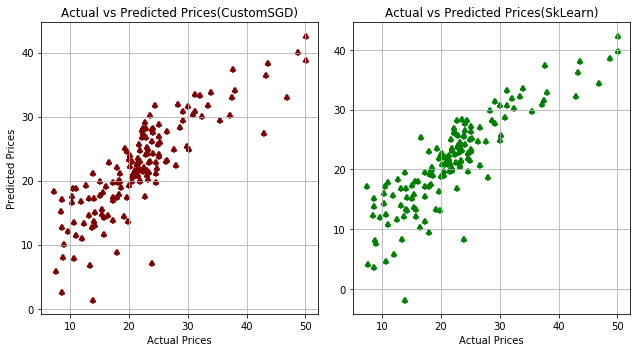

In [262]:
# Comparing two Graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
axes[0].scatter(Y_test, Y_pred,c="Maroon",marker=r'$\clubsuit$')
axes[0].grid()
axes[0].title.set_text('Actual vs Predicted Prices(CustomSGD)')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[1].scatter(Y_test, Sgd1.predict(X_test),c="Green",marker=r'$\clubsuit$')
axes[1].grid()
axes[1].title.set_text('Actual vs Predicted Prices(SkLearn)')
axes[1].set_xlabel('Actual Prices')
fig.tight_layout()

In [263]:
Weights_Table=PrettyTable()
Weights_Table.field_names=['SkLearn SGD Weights','Custom SGD Weights','Difference','% Change']
sum=0

# Weights from two numpy arrays
for (i,j) in np.nditer([Weights1,Weights2]):
    Weights_Table.add_row([i,j,abs(i-j),abs(round(((i-j)/i)*100))])
    
print(Weights_Table)

+----------------------+---------------------+----------------------+----------+
| SkLearn SGD Weights  |  Custom SGD Weights |      Difference      | % Change |
+----------------------+---------------------+----------------------+----------+
| -0.4407928207575811  |  -0.344531298466895 | 0.09626152229068607  |   22.0   |
|   0.32429668363429   |  0.9985871771152508 |  0.6742904934809608  |  208.0   |
| -0.20768168840098153 |  0.4103687510872076 |  0.6180504394881892  |  298.0   |
|  0.8061676440258025  |  0.7440187027939518 | 0.062148941231850774 |   8.0    |
|  -1.255406282325436  | -2.5346096787139407 |  1.2792033963885048  |  102.0   |
|   3.18291373410145   |  1.965206882570354  |  1.217706851531096   |   38.0   |
|  0.3045543992250758  |  0.9886634115772923 |  0.6841090123522164  |  225.0   |
|  -1.740089669954179  |  -2.923897750323783 |  1.1838080803696038  |   68.0   |
|  0.8913587220625535  |  2.092748354208902  |  1.2013896321463484  |  135.0   |
|  -0.360261049442896  | -1.